El notebook tiene como finalidad la aplicacion en algunos ejemplos en el uso de los modelos ensamblados (ensemble models)

## Librerias

In [1]:
## Conjunto de librerias a usar

# Generales
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import seaborn as sns
import dill
from IPython.display import Image  
import pydotplus
import xgboost

# Clonar modelos creados
from sklearn.base import clone 


## Funciones/Classes para Modelos
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn import tree
from sklearn.metrics import mean_squared_error


## Preprocesamiento
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler


# Conjunto de Datos a cargar
from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_moons
from sklearn.datasets import load_iris


## Clasificadores 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


## librerias Regresion Lineal
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor ## Stochastic gradient descent (alternativa Mini-Batch)
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression


## IMPORTANTE: Libreria sklearn
import sklearn as skl ## importar la libreria de sklearn como skl


## SVM 
from sklearn.svm import LinearSVC # clasificacion
from sklearn.svm import LinearSVR # regresion
from sklearn.svm import SVC
from sklearn.svm import SVR

## Trees - Arboles de decisiones
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

# Ensemble methods
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor


## advertencias
import warnings
## Ignorar las advertencias
warnings.filterwarnings('ignore')
## warnings.filterwarnings('always') ## mostrar advertencias


## fin

## Metodo ensamblado

In [2]:
# Cargar datos

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

# conjunto de datos
X,y = mnist['data'],mnist['target']

# dividir en conjuntos de datos de train y test
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=0)

print(X.shape)
print(y.shape)

# fin

(70000, 784)
(70000,)


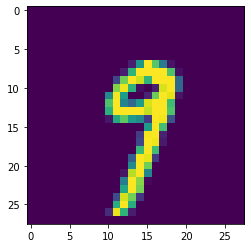

Valor de indice X[ii], valor ii: 133
valor target y: 9


In [3]:
# elegir aleatoriamente una imagen y visualizar

ii = random.randint(0,X.shape[0])

digito_random = X[ii]
digito = digito_random.reshape(28, 28) ## reshape

plt.imshow(digito, interpolation='nearest')
plt.show()

print('Valor de indice X[ii], valor ii: {}'.format(ii))
print('valor target y: {}'.format(y[ii]))

#print('Matriz de la imagen:\n\n{}'.format(X[ii]))

# fin

In [6]:
# Entrenar modelos diversos de clasificacion

log_cla = LogisticRegression()
raf_cla = RandomForestClassifier()
svm_cla = SVC()

voting = VotingClassifier(
    estimators=[('lr',log_cla),('rf',raf_cla),('svc',svm_cla)],
    voting = 'hard')

## voting = 'hard' : mayor votados
## voting = 'soft' : mayor probabilidad promedio

# Para usar voting = 'soft' se debe habiliar predict_proba() al SCV, es decir: SVC(probability=True)
# voting.fit(X_train, y_train) ## ajustar el modelo

# fin

In [7]:
# Por cada clasificador entrenado revisar sus indicadores de rendimiento

# recorrer cada modelo de clasificacion
for clf in (log_cla,raf_cla,voting):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))
    
# fin

LogisticRegression 0.9166857142857143
RandomForestClassifier 0.9661142857142857
VotingClassifier 0.9701714285714286


## modelo mediante tecnica de Bagging/Pasting

In [10]:
# Definir y entrar un modelo de Arboles con la aplicacion de la tecnica de baggin/pasting

bag_cla = BaggingClassifier(
    DecisionTreeClassifier(),n_estimators=500,
    max_samples = 100, bootstrap=True,oob_score=True)

bag_cla.fit(X_train,y_train)
y_pred = bag_cla.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test,y_pred))

# bag_cla.oob_decision_function_  ### observar las probabilidades de cada observacion 

# fin

Accuracy score:  0.8317142857142857


## modelo Random Forest clasificador

In [12]:
# Entrenar modelo de clasificacion con Random Forest 

rnd_cla = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16)
rnd_cla.fit(X_train,y_train)
y_pred = rnd_cla.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test,y_pred))

# fin

Accuracy score:  0.8201714285714286


In [16]:
## Importancia de Caracteristicas

# recorrer cada pixel de la imagen e imprimir su importancia calculada
for name,score in zip(mnist['feature_names'],rnd_cla.feature_importances_):
    print(name,' , ',score)
    
# fin

pixel1  ,  0.0
pixel2  ,  0.0
pixel3  ,  0.0
pixel4  ,  0.0
pixel5  ,  0.0
pixel6  ,  0.0
pixel7  ,  0.0
pixel8  ,  0.0
pixel9  ,  0.0
pixel10  ,  0.0
pixel11  ,  0.0
pixel12  ,  0.0
pixel13  ,  0.0
pixel14  ,  0.0
pixel15  ,  0.0
pixel16  ,  0.0
pixel17  ,  0.0
pixel18  ,  0.0
pixel19  ,  0.0
pixel20  ,  0.0
pixel21  ,  0.0
pixel22  ,  0.0
pixel23  ,  0.0
pixel24  ,  0.0
pixel25  ,  0.0
pixel26  ,  0.0
pixel27  ,  0.0
pixel28  ,  0.0
pixel29  ,  0.0
pixel30  ,  0.0
pixel31  ,  0.0
pixel32  ,  0.0
pixel33  ,  0.0
pixel34  ,  0.0
pixel35  ,  0.0
pixel36  ,  0.0
pixel37  ,  0.0
pixel38  ,  0.0
pixel39  ,  0.0
pixel40  ,  0.0
pixel41  ,  0.0
pixel42  ,  0.0
pixel43  ,  0.0
pixel44  ,  0.0
pixel45  ,  0.0
pixel46  ,  0.0
pixel47  ,  0.0
pixel48  ,  0.0
pixel49  ,  0.0
pixel50  ,  0.0
pixel51  ,  0.0
pixel52  ,  0.0
pixel53  ,  0.0
pixel54  ,  0.0
pixel55  ,  0.0
pixel56  ,  0.0
pixel57  ,  0.0
pixel58  ,  0.0
pixel59  ,  0.0
pixel60  ,  0.0
pixel61  ,  0.0
pixel62  ,  0.0
pixel63  ,  0.0
p

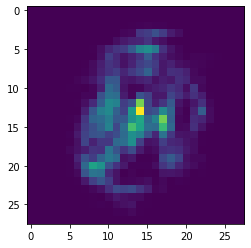

In [18]:
## Imagen con los pixeles mas importantes segun el clasificador Random Forest

digito_random = rnd_cla.feature_importances_
digito_random = digito_random/max(digito_random) ## escalar entre 0-1
digito = digito_random.reshape(28, 28) ## reshape

# graficar imagen
plt.imshow(digito, interpolation='nearest',vmin=0,vmax=1)
plt.show()

# fin

## modelo Gradiente boost regresion

In [2]:
# cargar datos

iris = datasets.load_iris()
X2 = iris['data'][:,:2]
#y2 = iris['target']
y2 = iris['data'][:,2] 

# dividir en conjuntos de datos de train y test
X2_train,X2_test, y2_train, y2_test = train_test_split(X2,y2,random_state=0)

# fin

In [3]:
# Gradient Boosting Regressor

gbreg = GradientBoostingRegressor(max_depth=2, n_estimators=5, learning_rate=1.0)
gbreg.fit(X2_train, y2_train)

y2_pred = gbreg.predict(X2_test)
print('Accuracy score: ', mean_squared_error(y2_test,y2_pred))

# fin

Accuracy score:  0.7716722166498478


## modelo XGBoost regresion

In [4]:
# Extreme gradient boosting

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X2_train, y2_train)
y3_pred = xgb_reg.predict(X2_test)

print('Accuracy score: ', mean_squared_error(y2_test,y2_pred))

# fin

[11:05:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy score:  0.7716722166498478
